In [1]:
# Install required libraries if not already installed
!pip install librosa matplotlib

import os
import zipfile
import librosa
import librosa.display
import matplotlib.pyplot as plt


   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 1.7 MB/s eta 0:00:02
   ------------------- -------------------- 1.3/2.7 MB 2.8 MB/s eta 0:00:01
   --------------------------- ------------ 1.8/2.7 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------  2.6/2.7 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   - -------------------------------------- 0.8/28.1 MB 3.7 MB/s eta 0:00:08
   -- ------------------------------------- 1.6/28.1 MB 3.6 MB/s eta 0:00:08
   -- ------------------------------------- 1.8/28.1 MB 3.5 MB/s eta 0:00:08
   --- -----------------------------

In [6]:
# Path to folder
folder_path = "processed_audio_files"  # Replace with the actual folder path


In [7]:
# Count the number of .wav files
wav_files_count = 0
wav_files_list = []

# Loop through the folder and look for .wav files
for root, _, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".wav"):
            wav_files_count += 1
            wav_files_list.append(os.path.join(root, file))

# Print the count and list
print(f"Number of .wav files: {wav_files_count}")


Number of .wav files: 932


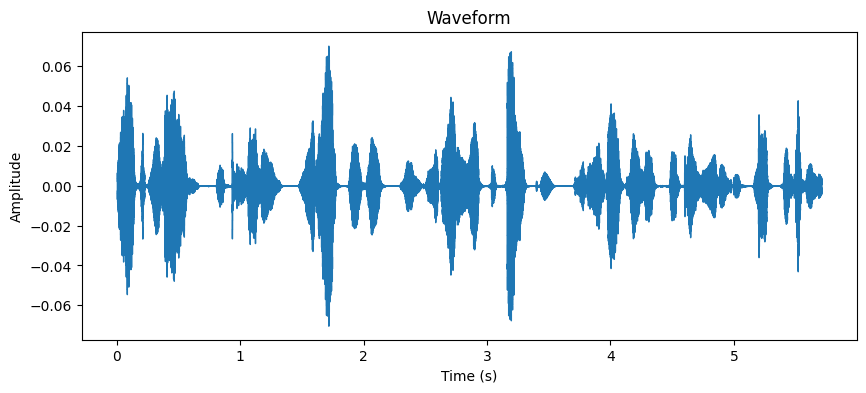

In [22]:
y, sr = librosa.load(wav_files_list[1])  # Load the first .wav file
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


In [23]:
from IPython.display import Audio

# Play the first .wav file in the list
audio_path = wav_files_list[1]
Audio(audio_path)


In [24]:


# Initializing variables to store total duration, min and max durations
total_duration = 0
min_duration = float('inf')  # Start with a very large number
max_duration = float('-inf')  # Start with a very small number

# Looping through each file in the wav_files_list
for wav_file in wav_files_list:
    y, sr = librosa.load(wav_file)  # Load the audio file
    duration = librosa.get_duration(y=y, sr=sr)  # Get the duration of the current file
    
    # Add to total duration
    total_duration += duration
    
    # Track min and max durations
    if duration < min_duration:
        min_duration = duration
    if duration > max_duration:
        max_duration = duration

# Calculate average duration
average_duration = total_duration / len(wav_files_list)

# Print the results
print(f"Total Duration of all files: {total_duration:.2f} seconds")
print(f"Average Duration: {average_duration:.2f} seconds")
print(f"Minimum Duration: {min_duration:.2f} seconds")
print(f"Maximum Duration: {max_duration:.2f} seconds")


Total Duration of all files: 5740.60 seconds
Average Duration: 6.16 seconds
Minimum Duration: 1.34 seconds
Maximum Duration: 15.16 seconds


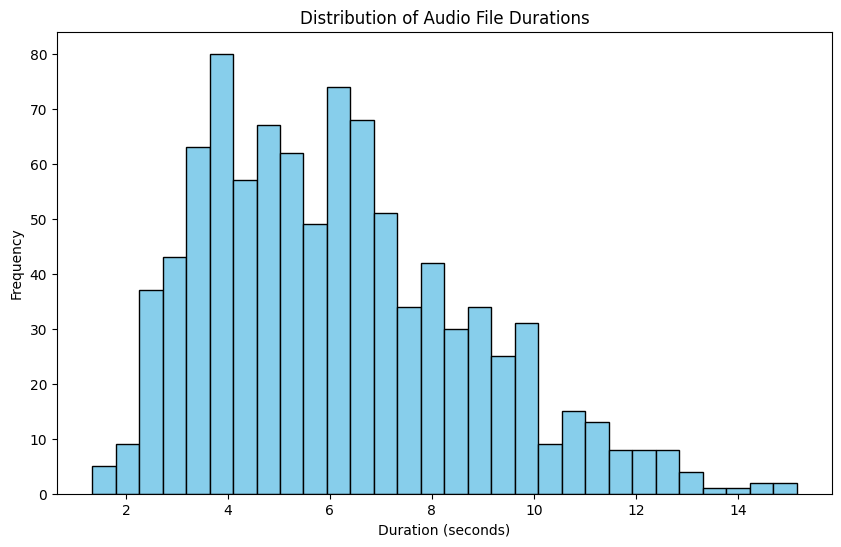

In [25]:


# Create a list to store durations
durations = []

# Collect durations for each file
for wav_file in wav_files_list:
    y, sr = librosa.load(wav_file)  # Load the audio file
    duration = librosa.get_duration(y=y, sr=sr)
    durations.append(duration)

# Plot histogram of durations
plt.figure(figsize=(10, 6))
plt.hist(durations, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Audio File Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()


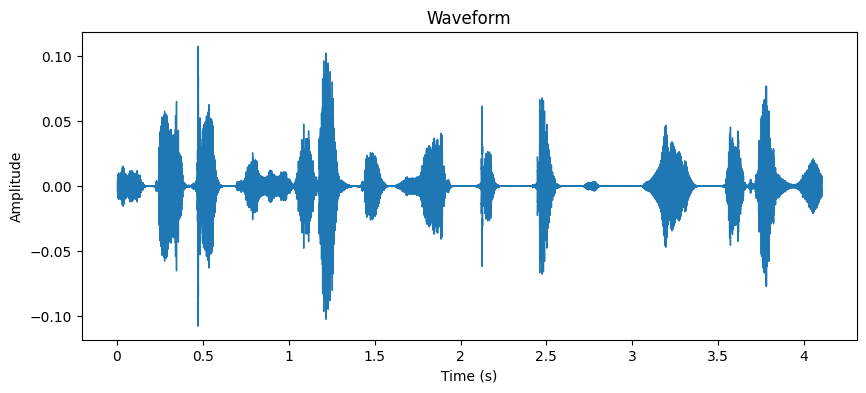

In [30]:
y, sr = librosa.load(wav_files_list[750])  # Load the first .wav file
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [31]:
from IPython.display import Audio

# Play the first .wav file in the list
audio_path = wav_files_list[750]
Audio(audio_path)

In [36]:
duration = librosa.get_duration(y=y, sr=sr)
print(f"Duration: {duration} seconds")

Duration: 4.101043083900227 seconds


In [37]:
file_example = wav_files_list[0]
y, sr = librosa.load(file_example)

# Print details of the first file
print(f"File: {file_example}")
print(f"Sample rate: {sr}")
print(f"Duration: {librosa.get_duration(y=y, sr=sr):.2f} seconds")

File: processed_audio_files\100N.wav
Sample rate: 22050
Duration: 5.91 seconds


In [42]:

rms_values = []
zero_crossings_values = []


# Loop through all audio files for analysis
for file in wav_files_list:
    y, sr = librosa.load(file)  # Load the audio file

    
    # RMS Energy
    rms = librosa.feature.rms(y=y)
    rms_values.append(np.mean(rms))

    # Zero-Crossing Rate
    zero_crossings = librosa.feature.zero_crossing_rate(y)
    zero_crossings_values.append(np.mean(zero_crossings))

rms_values = []
zero_crossings_values = []


# Loop through all audio files for analysis
for file in wav_files_list:
    y, sr = librosa.load(file)  # Load the audio file

    # RMS Energy
    rms = librosa.feature.rms(y=y)
    rms_values.append(np.mean(rms))

    # Zero-Crossing Rate
    zero_crossings = librosa.feature.zero_crossing_rate(y)
    zero_crossings_values.append(np.mean(zero_crossings))


# Calculate and display summary statistics

print(f"Average RMS: {np.mean(rms_values):.2f}")
print(f"Average Zero-Crossing Rate: {np.mean(zero_crossings_values):.2f}")



Average RMS: 0.01
Average Zero-Crossing Rate: 0.13


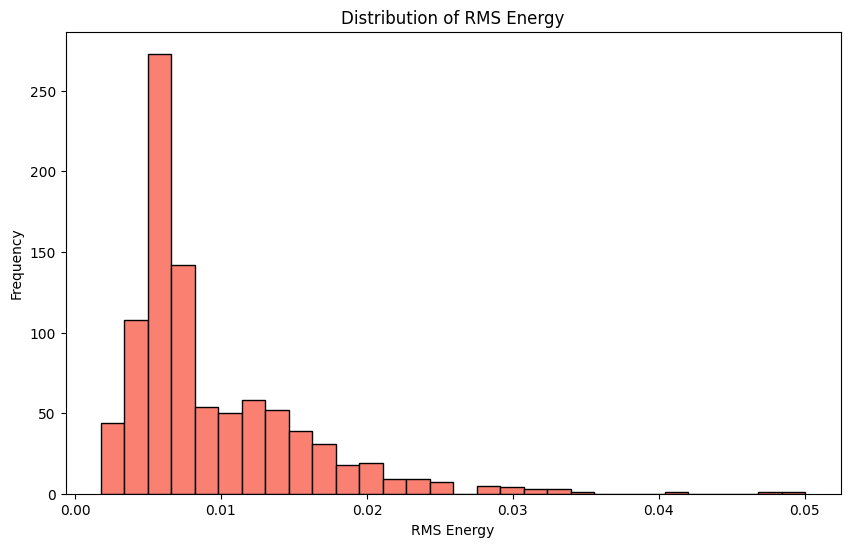

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(rms_values, bins=30, color='salmon', edgecolor='black')
plt.title("Distribution of RMS Energy")
plt.xlabel("RMS Energy")
plt.ylabel("Frequency")
plt.show()


In [45]:
pitch_all_files = []
mfccs_all_files = []
for file in wav_files_list:
    y, sr = librosa.load(file)
    
    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_all_files.append(np.mean(mfccs, axis=1))  # Take mean of MFCCs for simplicity
    # Flatten the list of MFCCs for all files into a single array for plotting
    flat_mfccs = np.array(mfccs_all_files).flatten()
    
    # Extract Pitch (Fundamental Frequency)
    pitch, _ = librosa.core.piptrack(y=y, sr=sr)
    pitch_all_files.append(np.mean(pitch[pitch > 0]))  # Take the mean of non-zero pitch values

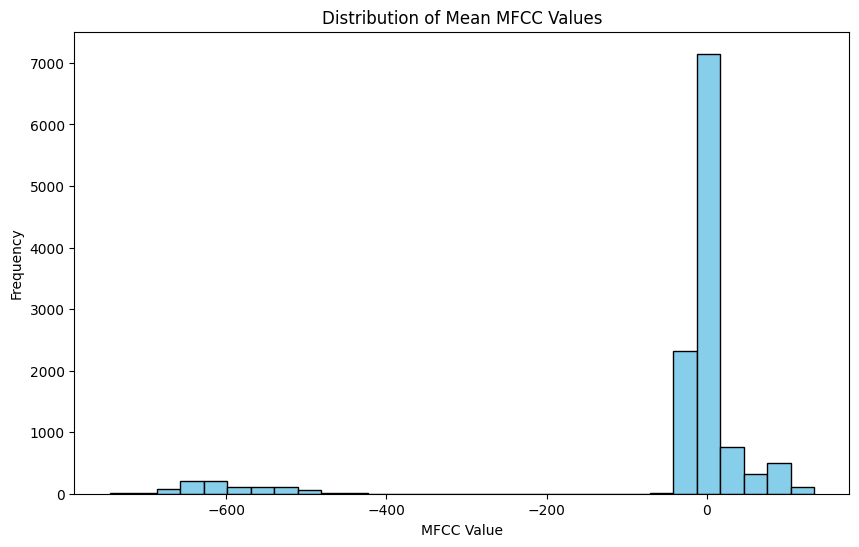

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(flat_mfccs, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Mean MFCC Values")
plt.xlabel("MFCC Value")
plt.ylabel("Frequency")
plt.show()

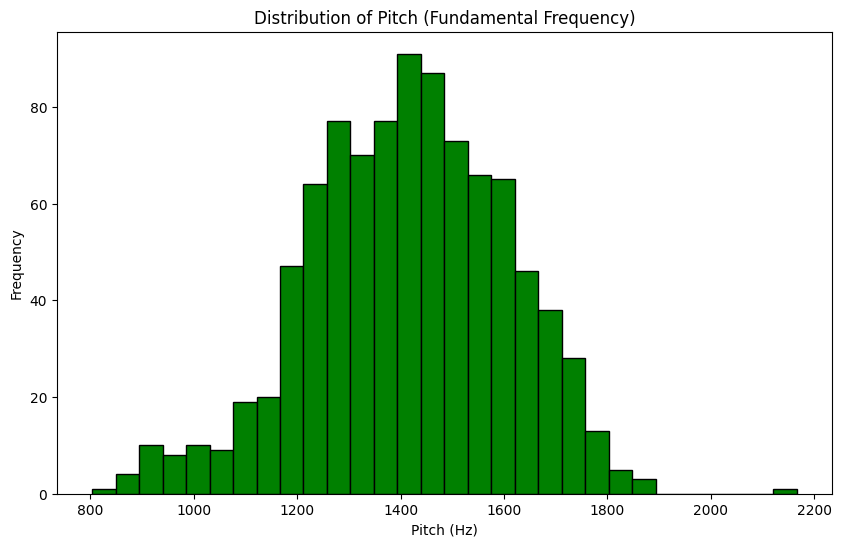

In [47]:
plt.figure(figsize=(10, 6))
plt.hist(pitch_all_files, bins=30, color='green', edgecolor='black')
plt.title("Distribution of Pitch (Fundamental Frequency)")
plt.xlabel("Pitch (Hz)")
plt.ylabel("Frequency")
plt.show()